In [1]:
import os
SNAPPY_notebook_path = os.path.join(os.path.abspath(""), "bench.ipynb")

In [2]:
import time
SNAPPY_start_time = time.perf_counter_ns()

In [3]:
%load_ext autotime

time: 38.9 µs (started: 2024-05-22 19:45:19 -04:00)


<center><h1> 🏫What course are your going to take next semester?📚 </h1></center>

#### What is your favorite course or class? Or what was your favorite course or class? I loved computer science course and sports courses. When I was in university, it was really hard to choose which class to take next semester. Because I didn't want to waste of my time. What methods did you use to choose which courses or classes to take next semester? How about this method? Let's check it out!

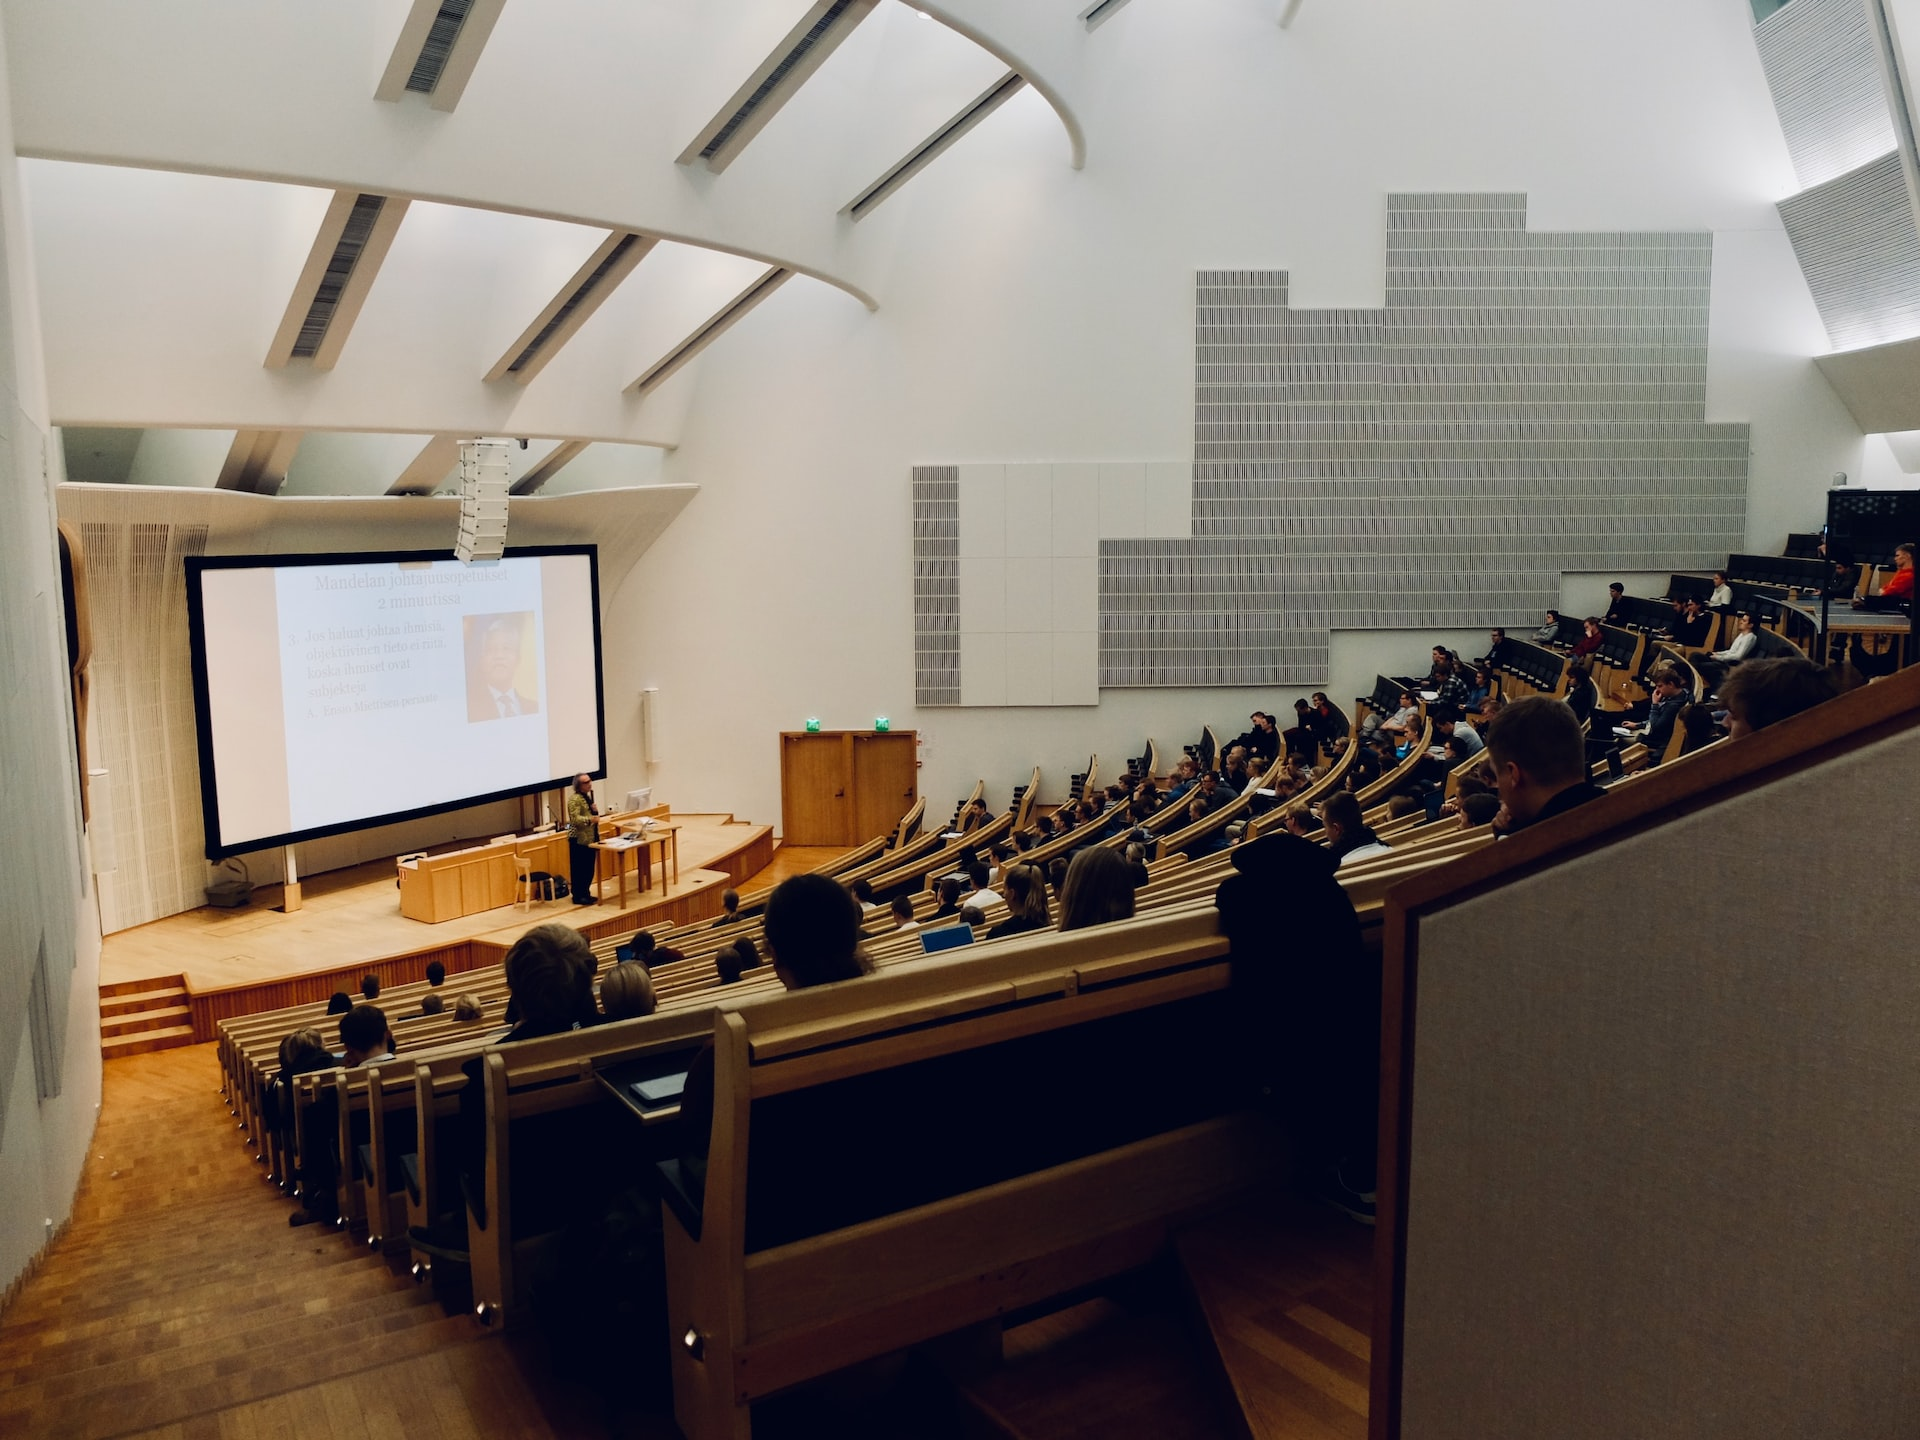

<a id="intro"></a>
# Data Introduction💁
- **course_code:** Course code at the University of Waterloo as stated on uwflow.com
- **course_title:** Title of the course
- **num_ratings:** number of course reviews (a review need not contain text, only feedback such as "useful", "easy", etc..)
- **useful:** Percent of reviewers that said the course was useful
- **easy:** Percent of reviewers that said the course was easy
- **liked:** Percent of reviewers that said they liked the course
- **num_reviews:** Number of reviews for the course that included a text review
- **reviews:** Course reviews
- **course_rating:** Whether or not the reviewer said they liked the course
- **course_rating_int:** Whether or not the reviewer said they liked the course, as an integer.

# 🏫Table of Contents👩‍🎓
- [1. Import Libraries](#import)
- [2. Check Data and Preparation](#check)
- [3. EDA & Visualization](#eda)
    - [3-1. Ranking Graph](#ranking)
- [4. KOREA Course](#korea): Top rated course
- [5. CHINA Course](#china): Second rated course
- [6. SPANISH Course](#spanish): Third rated course
- [7. Computer Science Course](#computer)
- [8. Work-term Report Course](#work): Worst rated course
- [9. Professional Development Course](#pd): Second worst rated course

<a id="import"></a>
# 1️⃣ㅣImport Libraries

In [4]:
import os
# STEFANOS: Conditionally import Modin Pandas
import pandas as pd
import numpy as np


time: 215 ms (started: 2024-05-22 19:45:19 -04:00)


In [5]:
def hash_anything(obj):
    import pandas.util
    if isinstance(obj, pd.DataFrame):
        return pandas.util.hash_pandas_object(obj, index=False).to_numpy().data
    elif isinstance(obj, np.ndarray):
        return obj.data
    elif isinstance(obj, list):
        return str(obj).encode()
    else:
        return str(obj).encode()


def hash_dataframe(df):
    import xxhash
    h = xxhash.xxh64()
    for column in df.round(6).columns:
        h.update(hash_anything(df[column]))
    return h.digest()


time: 474 µs (started: 2024-05-22 19:45:19 -04:00)


<a id="check"></a>
# 2️⃣ㅣCheck Data and Preparation💾

In [6]:
course = pd.read_csv(os.path.abspath('') + "/input/course-reviews-university-of-waterloo/course_data_clean.csv")

time: 43.1 ms (started: 2024-05-22 19:45:19 -04:00)


# -- STEFANOS -- Replicate Data

In [7]:
factor = 300
course = pd.concat([course]*factor, ignore_index=True)
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451400 entries, 0 to 4451399
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   course_code        object 
 1   course_title       object 
 2   num_ratings        int64  
 3   useful             object 
 4   easy               object 
 5   liked              object 
 6   num_reviews        int64  
 7   reviews            object 
 8   course_rating      object 
 9   course_rating_int  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 339.6+ MB
time: 271 ms (started: 2024-05-22 19:45:19 -04:00)


In [8]:
course.shape

(4451400, 10)

time: 2.86 ms (started: 2024-05-22 19:45:19 -04:00)


In [9]:
course.head(10)

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0
5,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I recommend finding a course with a language t...,liked course,1.0
6,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,"I really enjoyed this course online, being co-...",liked course,1.0
7,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,math student who took this course since I had ...,disliked course,0.0
8,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,The only way to do bad in this course is by no...,liked course,1.0
9,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,"Can be difficult at times, but a very rewardin...",liked course,1.0


time: 7.83 ms (started: 2024-05-22 19:45:19 -04:00)


In [10]:
course.tail(10)

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
4451390,AFM 345,Business Applications of Social Media Analytics,1,25%,25%,0%,1,This course is effectively entirely based off ...,disliked course,0.0
4451391,GER 330,Infamous Lovers,1,50%,75%,100%,1,"Read Tristan and Isolde, a historic love story...",liked course,1.0
4451392,GSJ 410,Eighteenth-Century Women Writers,1,75%,75%,100%,1,This is a really wonderful course! Dr. Fraser ...,liked course,1.0
4451393,SOC 436,Alcohol and Well-Being,1,50%,25%,100%,1,While this course ended up being relatively in...,liked course,1.0
4451394,BME 588,Special Topics in Biomechanics,1,25%,25%,0%,1,Personally did not find Computational Biomecha...,disliked course,0.0
4451395,ASL 102R,American Sign Language 2,1,100%,75%,100%,1,Took this online with Georgia Whalen. As it wa...,liked course,1.0
4451396,CS 136L,Tools and Techniques for Software Development,1,100%,100%,100%,1,I either designed or helped design the majorit...,liked course,1.0
4451397,AFM 417,Special Topics in Accounting,0,NaN,NaN,NaN,1,Topic 3: Intro to Data Analytics,NaN,NaN
4451398,ECON 472,Senior Honours Essay,0,100%,0%,NaN,1,Not sure if I liked this course yet. Definitel...,NaN,NaN
4451399,PMATH 440,Analytic Number Theory,0,0%,0%,NaN,1,This course was not as interesting as I hoped ...,NaN,NaN


time: 5.44 ms (started: 2024-05-22 19:45:19 -04:00)


In [11]:
course.describe()

,num_ratings,num_reviews,course_rating_int
count,4.451400e+06,4.451400e+06,4.384800e+06
mean,2.389567e+02,4.583138e+01,6.695402e-01
std,3.085135e+02,5.448559e+01,4.703787e-01
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,3.300000e+01,7.000000e+00,0.000000e+00
50%,1.040000e+02,2.200000e+01,1.000000e+00
75%,3.410000e+02,6.600000e+01,1.000000e+00
max,2.111000e+03,2.530000e+02,1.000000e+00


time: 214 ms (started: 2024-05-22 19:45:19 -04:00)


In [12]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451400 entries, 0 to 4451399
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   course_code        object 
 1   course_title       object 
 2   num_ratings        int64  
 3   useful             object 
 4   easy               object 
 5   liked              object 
 6   num_reviews        int64  
 7   reviews            object 
 8   course_rating      object 
 9   course_rating_int  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 339.6+ MB
time: 2.39 ms (started: 2024-05-22 19:45:20 -04:00)


### We don't need data which has no course rating int value. So drop it.

In [13]:
course = course.dropna()

time: 2.69 s (started: 2024-05-22 19:45:20 -04:00)


### Extract course unit and course number from course code. I'm going to group by course code so I need it.

In [14]:
course[["course_unit", "course_num"]] = course["course_code"].str.split(" ", expand=True)

time: 4.42 s (started: 2024-05-22 19:45:22 -04:00)


In [15]:
course

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,course_unit,course_num
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,CS,115
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,CS,115
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,CS,115
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0,CS,115
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0,CS,115
...,...,...,...,...,...,...,...,...,...,...,...,...
4451392,GSJ 410,Eighteenth-Century Women Writers,1,75%,75%,100%,1,This is a really wonderful course! Dr. Fraser ...,liked course,1.0,GSJ,410
4451393,SOC 436,Alcohol and Well-Being,1,50%,25%,100%,1,While this course ended up being relatively in...,liked course,1.0,SOC,436
4451394,BME 588,Special Topics in Biomechanics,1,25%,25%,0%,1,Personally did not find Computational Biomecha...,disliked course,0.0,BME,588
4451395,ASL 102R,American Sign Language 2,1,100%,75%,100%,1,Took this online with Georgia Whalen. As it wa...,liked course,1.0,ASL,102R


time: 8.28 ms (started: 2024-05-22 19:45:27 -04:00)


### If number of people who rated is under 10, I think that data is not reliable. I can't ruin my semester because of those unreliable data!

In [16]:
course[course["num_reviews"] < 10].index

Int64Index([    553,     554,     555,     556,     557,     558,     559,
                560,    1534,    1535,
            ...
            4451387, 4451388, 4451389, 4451390, 4451391, 4451392, 4451393,
            4451394, 4451395, 4451396],
           dtype='int64', length=1359000)

time: 615 ms (started: 2024-05-22 19:45:27 -04:00)


In [17]:
course.drop(course[course["num_reviews"] < 10].index, inplace=True)

time: 581 ms (started: 2024-05-22 19:45:27 -04:00)


In [18]:
course

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,course_unit,course_num
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,CS,115
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,CS,115
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,CS,115
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0,CS,115
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0,CS,115
...,...,...,...,...,...,...,...,...,...,...,...,...
4449180,SDS 250R,Social Statistics,17,72%,45%,29%,12,Challenging course for someone who is not from...,disliked course,0.0,SDS,250R
4449181,SDS 250R,Social Statistics,17,72%,45%,29%,12,"I am not a math person, but I found this on th...",disliked course,0.0,SDS,250R
4449182,SDS 250R,Social Statistics,17,72%,45%,29%,12,"Mandatory for SDS degrees, make sure you are u...",disliked course,0.0,SDS,250R
4449183,SDS 250R,Social Statistics,17,72%,45%,29%,12,This class was easier than expected considerin...,disliked course,0.0,SDS,250R


time: 7.93 ms (started: 2024-05-22 19:45:28 -04:00)


### I'm going to look relationship between useful, easy, liked and course rating score. So eliminate %.

In [19]:
for i in ["useful", "easy", "liked"]:
    course[i] = course[i].str.replace("%", "")
    course[i] = course[i].astype("int")

time: 2.78 s (started: 2024-05-22 19:45:28 -04:00)


In [20]:
course.set_index("course_unit", inplace=True)

time: 1.19 ms (started: 2024-05-22 19:45:31 -04:00)


In [21]:
course

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,course_num
course_unit,,,,,,,,,,,
CS,CS 115,Introduction to Computer Science 1,2111,21,10,23,86,go to office hours and practice,liked course,1.0,115
CS,CS 115,Introduction to Computer Science 1,2111,21,10,23,86,One of my least favourite courses. Although th...,disliked course,0.0,115
CS,CS 115,Introduction to Computer Science 1,2111,21,10,23,86,It starts with a very low pace but after midte...,disliked course,0.0,115
CS,CS 115,Introduction to Computer Science 1,2111,21,10,23,86,Took this in 2018 with no programming experien...,liked course,1.0,115
CS,CS 115,Introduction to Computer Science 1,2111,21,10,23,86,I loved everything about cs 115. Great instruc...,liked course,1.0,115
...,...,...,...,...,...,...,...,...,...,...,...
SDS,SDS 250R,Social Statistics,17,72,45,29,12,Challenging course for someone who is not from...,disliked course,0.0,250R
SDS,SDS 250R,Social Statistics,17,72,45,29,12,"I am not a math person, but I found this on th...",disliked course,0.0,250R
SDS,SDS 250R,Social Statistics,17,72,45,29,12,"Mandatory for SDS degrees, make sure you are u...",disliked course,0.0,250R


time: 196 ms (started: 2024-05-22 19:45:31 -04:00)


### We don't need course title because we have course code. And we don't need reviews and course_rating.

In [22]:
course.drop(["course_title", "reviews", "course_rating"], axis=1, inplace=True)

time: 74.8 ms (started: 2024-05-22 19:45:31 -04:00)


In [23]:
course

,course_code,num_ratings,useful,easy,liked,num_reviews,course_rating_int,course_num
course_unit,,,,,,,,
CS,CS 115,2111,21,10,23,86,1.0,115
CS,CS 115,2111,21,10,23,86,0.0,115
CS,CS 115,2111,21,10,23,86,0.0,115
CS,CS 115,2111,21,10,23,86,1.0,115
CS,CS 115,2111,21,10,23,86,1.0,115
...,...,...,...,...,...,...,...,...
SDS,SDS 250R,17,72,45,29,12,0.0,250R
SDS,SDS 250R,17,72,45,29,12,0.0,250R
SDS,SDS 250R,17,72,45,29,12,0.0,250R


time: 5.85 ms (started: 2024-05-22 19:45:31 -04:00)


In [24]:
course.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3022500 entries, CS to SDS
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   course_code        object 
 1   num_ratings        int64  
 2   useful             int64  
 3   easy               int64  
 4   liked              int64  
 5   num_reviews        int64  
 6   course_rating_int  float64
 7   course_num         object 
dtypes: float64(1), int64(5), object(2)
memory usage: 207.5+ MB
time: 2.44 ms (started: 2024-05-22 19:45:31 -04:00)


In [25]:
course_gp = course.groupby("course_unit").mean(numeric_only=True)

time: 209 ms (started: 2024-05-22 19:45:31 -04:00)


In [26]:
course_gp

,num_ratings,useful,easy,liked,num_reviews,course_rating_int
course_unit,,,,,,
ACTSC,89.957447,86.425532,60.425532,66.042553,17.744681,0.638298
AFM,222.188153,73.783972,55.519164,53.365854,48.139373,0.550523
AHS,61.648649,37.702703,88.243243,52.783784,22.243243,0.513514
AMATH,88.950000,88.150000,70.625000,81.375000,20.450000,0.875000
ANTH,35.000000,56.000000,76.000000,74.000000,13.000000,0.769231
...,...,...,...,...,...,...
SPCOM,322.571429,58.372294,69.909091,60.805195,81.467532,0.649351
STAT,369.975610,79.710801,56.341463,63.226481,73.797909,0.634146
STV,68.444444,21.296296,82.518519,53.074074,13.518519,0.592593


time: 6.08 ms (started: 2024-05-22 19:45:31 -04:00)


In [27]:
# STEFANOS-DISABLE-FOR-MODIN: Modin seems to fail in the LHS, giving an error that "course_rating_mean" is
# not in the DF. Of course, it's valid code because we're creating this column here.
# The problem we cannot just disable this code because follow-up code depends on this column. So, we will create
# the column before the loop so that indexing in the LHS does not fail.

###### ORIGINAL CODE ###########
# for i in course_gp.index:
#     course.loc[i, "course_rating_mean"] = course_gp.loc[i, "course_rating_int"]

###### CODE THAT MODIN CAN RUN ########
course["course_rating_mean"] = None
for i in course_gp.index:
    course.loc[i, "course_rating_mean"] = course_gp.loc[i, "course_rating_int"]

time: 3.16 s (started: 2024-05-22 19:45:31 -04:00)


In [28]:
print(hash_dataframe(course))

b'\xd4\xfe\xbb|\xb1\xfe\xd3\xc8'
time: 1 s (started: 2024-05-22 19:45:34 -04:00)


In [29]:
course

,course_code,num_ratings,useful,easy,liked,num_reviews,course_rating_int,course_num,course_rating_mean
course_unit,,,,,,,,,
CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
CS,CS 115,2111,21,10,23,86,0.0,115,0.761485
CS,CS 115,2111,21,10,23,86,0.0,115,0.761485
CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
...,...,...,...,...,...,...,...,...,...
SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317
SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317
SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317


time: 6.2 ms (started: 2024-05-22 19:45:35 -04:00)


In [30]:
# course.reset_index(inplace=True)

time: 1.44 ms (started: 2024-05-22 19:45:35 -04:00)


In [31]:
course

,course_code,num_ratings,useful,easy,liked,num_reviews,course_rating_int,course_num,course_rating_mean
course_unit,,,,,,,,,
CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
CS,CS 115,2111,21,10,23,86,0.0,115,0.761485
CS,CS 115,2111,21,10,23,86,0.0,115,0.761485
CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
...,...,...,...,...,...,...,...,...,...
SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317
SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317
SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317


time: 5.74 ms (started: 2024-05-22 19:45:35 -04:00)


In [32]:
course.groupby("course_unit").mean()["course_rating_int"]

/tmp/ipykernel_14651/655336656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  course.groupby("course_unit").mean()["course_rating_int"]


course_unit
ACTSC    0.638298
AFM      0.550523
AHS      0.513514
AMATH    0.875000
ANTH     0.769231
           ...   
SPCOM    0.649351
STAT     0.634146
STV      0.592593
SYDE     0.575000
WKRPT    0.037037
Name: course_rating_int, Length: 69, dtype: float64

time: 220 ms (started: 2024-05-22 19:45:35 -04:00)


In [33]:
course[course["course_code"].str.startswith("CS")].value_counts()

course_code  num_ratings  useful  easy  liked  num_reviews  course_rating_int  course_num  course_rating_mean
CS 135       687          90      69    89     146          1.0                135         0.761485              39300
CS 136       552          96      60    88     117          1.0                136         0.761485              30300
CS 246       621          65      60    60     112          1.0                246         0.761485              28800
CS 241       453          94      55    91     94           1.0                241         0.761485              25200
CS 245       537          24      56    28     99           0.0                245         0.761485              21900
                                                                                                                 ...  
CS 486       102          93      54    91     21           0.0                486         0.761485                600
CS 137       267          94      87    96     46        

time: 843 ms (started: 2024-05-22 19:45:36 -04:00)


In [34]:
course

,course_code,num_ratings,useful,easy,liked,num_reviews,course_rating_int,course_num,course_rating_mean
course_unit,,,,,,,,,
CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
CS,CS 115,2111,21,10,23,86,0.0,115,0.761485
CS,CS 115,2111,21,10,23,86,0.0,115,0.761485
CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
...,...,...,...,...,...,...,...,...,...
SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317
SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317
SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317


time: 6.39 ms (started: 2024-05-22 19:45:37 -04:00)


<a id="eda"></a>
# 3️⃣ㅣEDA & Visualization📊

### Let's see relationshtp overview between variables.

In [35]:
# STEFANOS: Disable plotting
# plt.figure(figsize=(25,20))
# sns.pairplot(data=course)
# plt.show()

time: 983 µs (started: 2024-05-22 19:45:37 -04:00)


In [36]:
# STEFANOS: Disable plotting
# plt.figure(figsize=(12,10))
# sns.scatterplot(x="num_ratings", y="course_rating_mean", data=course)
# plt.show()

time: 132 µs (started: 2024-05-22 19:45:37 -04:00)


In [37]:
# STEFANOS: Disable plotting
# plt.figure(figsize=(12,10))
# sns.scatterplot(x="num_reviews", y="course_rating_mean", data=course)
# plt.show()

time: 130 µs (started: 2024-05-22 19:45:37 -04:00)


In [38]:
# STEFANOS: Disable plotting
# plt.figure(figsize=(25,20))
# sns.scatterplot(x="useful", y="course_rating_mean", hue="course_unit", data=course)
# plt.xlabel("useful", fontsize = 20)
# plt.ylabel("Course Rating Mean", fontsize = 20)
# plt.show()

time: 202 µs (started: 2024-05-22 19:45:37 -04:00)


### The two variables have a direct proportional relationship.

In [39]:
# STEFANOS: Disable plotting
# plt.figure(figsize=(25,20))
# sns.scatterplot(x="easy", y="course_rating_mean", hue="course_unit", data=course)
# plt.xlabel("easy", fontsize = 20)
# plt.ylabel("Course Rating Mean", fontsize = 20)
# plt.show()

time: 150 µs (started: 2024-05-22 19:45:37 -04:00)


### The two variables have a not strong relatioship.

In [40]:
# STEFANOS: Disable plotting
# plt.figure(figsize=(25,20))
# sns.scatterplot(x="liked", y="course_rating_mean", hue="course_unit", data=course)
# plt.xlabel("liked", fontsize = 20)
# plt.ylabel("Course Rating Mean", fontsize = 20)
# plt.show()

time: 151 µs (started: 2024-05-22 19:45:37 -04:00)


### The two variables have a direct proportional relationship

<a id="ranking"></a>
## Ranking Graph 📊

In [41]:
course.sort_values("course_rating_mean", ascending=False, inplace=True)

# STEFANOS: Disable plotting
# plt.figure(figsize=(25,20))
# sns.set_palette("Pastel1")
# sns.barplot(x="course_rating_mean", y="course_unit", data=course)
# plt.xlabel("Course Rating Mean", fontsize = 20)
# plt.ylabel("Course Unit", fontsize = 20)
# plt.show()

time: 1.88 s (started: 2024-05-22 19:45:37 -04:00)


### We can see language courses are top rated. And top of top is KOREA course. Bottom of bottom is Work-term Report course. Let's check it out more.

### Let's check top rated courses, computer science course and bottom courses.

<a id="korea"></a>
# 4️⃣ㅣKOREA Course: Ranking 1st place

In [42]:
course.reset_index(inplace=True)

time: 52.7 ms (started: 2024-05-22 19:45:38 -04:00)


In [43]:
course.set_index("course_unit", inplace=True)

time: 1.59 ms (started: 2024-05-22 19:45:38 -04:00)


In [44]:
course.loc["KOREA", "course_rating_mean"].value_counts()

1.0    5100
Name: course_rating_mean, dtype: int64

time: 370 ms (started: 2024-05-22 19:45:38 -04:00)


In [45]:
KOREA = course.loc["KOREA", :]

time: 89.8 ms (started: 2024-05-22 19:45:39 -04:00)


In [46]:
# STEFANOS: Disable plotting
# plt.figure(figsize=(10,10))
# sns.barplot(x="course_code", y="course_rating_mean", data=KOREA)
# plt.xlabel("KOREA course", fontsize = 20)
# plt.ylabel("Course Rating Mean", fontsize = 20)
# plt.show()

time: 179 µs (started: 2024-05-22 19:45:39 -04:00)


### Korea course has just one class and all students answered it was great.

<a id="china"></a>
# 5️⃣ㅣCHINA Course: Ranking 2nd place

In [47]:
course.loc["CHINA", "course_rating_mean"].value_counts()

1.0    3300
Name: course_rating_mean, dtype: int64

time: 92 ms (started: 2024-05-22 19:45:39 -04:00)


In [48]:
china = course.loc["CHINA", :]

time: 90 ms (started: 2024-05-22 19:45:39 -04:00)


In [49]:
# STEFANOS: Disable plotting
# plt.figure(figsize=(10,10))
# sns.barplot(x="course_code", y="course_rating_mean", data=china)
# plt.xlabel("CHINA course", fontsize = 20)
# plt.ylabel("Course Rating Mean", fontsize = 20)
# plt.show()

time: 183 µs (started: 2024-05-22 19:45:39 -04:00)


### China course has only one class too, and students answered it was great.

<a id="spanish"></a>
# 6️⃣ㅣSPANISH Course: Ranking 3rd place

In [50]:
course.loc["CHINA", "course_rating_mean"].value_counts()

1.0    3300
Name: course_rating_mean, dtype: int64

time: 91.8 ms (started: 2024-05-22 19:45:39 -04:00)


In [51]:
span = course.loc["SPAN", :]

# STEFANOS: Disable plotting
# plt.figure(figsize=(10,10))
# sns.barplot(x="course_code", y="course_rating_mean", data=span)
# plt.xlabel("SPANISH course", fontsize = 20)
# plt.ylabel("Course Rating Mean", fontsize = 20)
# plt.show()

time: 91 ms (started: 2024-05-22 19:45:39 -04:00)


### Spanish course has only one class too. But not all students answered it was great. Still it is top rated course. If you hesitate to take spanish course, don't!

<a id="computer"></a>
# 7️⃣ㅣComputer Science Course

In [52]:
course.loc["CS", "course_rating_mean"].value_counts()

0.761485    476700
Name: course_rating_mean, dtype: int64

time: 137 ms (started: 2024-05-22 19:45:39 -04:00)


In [53]:
cs = course.loc["CS", :]
cs

,course_code,num_ratings,useful,easy,liked,num_reviews,course_rating_int,course_num,course_rating_mean
course_unit,,,,,,,,,
CS,CS 492,34,47,90,68,13,1.0,492,0.761485
CS,CS 116,282,90,77,83,60,1.0,116,0.761485
CS,CS 452,24,100,38,96,10,1.0,452,0.761485
CS,CS 492,34,47,90,68,13,1.0,492,0.761485
CS,CS 492,34,47,90,68,13,1.0,492,0.761485
...,...,...,...,...,...,...,...,...,...
CS,CS 137,267,94,87,96,46,1.0,137,0.761485
CS,CS 137,267,94,87,96,46,1.0,137,0.761485
CS,CS 146,116,92,46,89,33,1.0,146,0.761485


time: 121 ms (started: 2024-05-22 19:45:39 -04:00)


In [54]:
cs_mean = cs.groupby("course_code").mean(numeric_only=True).sort_values("course_rating_int", ascending=False)
cs_mean

,num_ratings,useful,easy,liked,num_reviews,course_rating_int
course_code,,,,,,
CS 452,24.0,100.0,38.0,96.0,10.0,1.000000
CS 488,103.0,46.0,58.0,50.0,14.0,1.000000
CS 145,208.0,63.0,63.0,72.0,49.0,0.979592
CS 137,267.0,94.0,87.0,96.0,46.0,0.955556
CS 146,116.0,92.0,46.0,89.0,33.0,0.937500
CS 466,66.0,62.0,48.0,65.0,16.0,0.937500
CS 246E,41.0,97.0,23.0,98.0,15.0,0.933333
CS 370,182.0,86.0,61.0,79.0,38.0,0.916667
CS 135,687.0,90.0,69.0,89.0,146.0,0.909722


time: 33.4 ms (started: 2024-05-22 19:45:40 -04:00)


In [55]:
# STEFANOS: Disable plotting
# plt.figure(figsize=(15,10))
# sns.barplot(x="course_rating_int", y=cs_mean.index, data=cs_mean)
# plt.xlabel("Course Rating Mean", fontsize = 20)
# plt.ylabel("CS Course", fontsize = 20)
# plt.show()

time: 225 µs (started: 2024-05-22 19:45:40 -04:00)


### Computer Science Course has many classes. So I lined up all classes by rating score mean. If you want to take Computer Science course, with this data you will be able to help decide.

<a id="work"></a>
# 8️⃣ㅣWork-term Report: Worst rated

In [56]:
course.loc["WKRPT", "course_rating_mean"].value_counts()

0.037037    8100
Name: course_rating_mean, dtype: int64

time: 94.1 ms (started: 2024-05-22 19:45:40 -04:00)


In [57]:
wkrpt = course.loc["WKRPT", :]
wkrpt

,course_code,num_ratings,useful,easy,liked,num_reviews,course_rating_int,course_num,course_rating_mean
course_unit,,,,,,,,,
WKRPT,WKRPT 200,224,14,30,5,13,0.0,200,0.037037
WKRPT,WKRPT 400,103,8,44,5,16,0.0,400,0.037037
WKRPT,WKRPT 400,103,8,44,5,16,0.0,400,0.037037
WKRPT,WKRPT 400,103,8,44,5,16,0.0,400,0.037037
WKRPT,WKRPT 400,103,8,44,5,16,0.0,400,0.037037
...,...,...,...,...,...,...,...,...,...
WKRPT,WKRPT 400,103,8,44,5,16,0.0,400,0.037037
WKRPT,WKRPT 400,103,8,44,5,16,0.0,400,0.037037
WKRPT,WKRPT 400,103,8,44,5,16,0.0,400,0.037037


time: 96.1 ms (started: 2024-05-22 19:45:40 -04:00)


In [58]:
wkrpt_mean = wkrpt.groupby("course_code").mean(numeric_only=True).sort_values("course_rating_int", ascending=False)
wkrpt_mean

,num_ratings,useful,easy,liked,num_reviews,course_rating_int
course_code,,,,,,
WKRPT 200,224.0,14.0,30.0,5.0,13.0,0.076923
WKRPT 400,103.0,8.0,44.0,5.0,16.0,0.000000


time: 5.55 ms (started: 2024-05-22 19:45:40 -04:00)


In [59]:
# STEFANOS: Disable plotting
# plt.figure(figsize=(15,10))
# sns.barplot(x="course_rating_int", y=wkrpt_mean.index, data=wkrpt_mean)
# plt.xlabel("Course Rating Mean", fontsize = 20)
# plt.ylabel("WKRPT Course", fontsize = 20)
# plt.show()

time: 156 µs (started: 2024-05-22 19:45:40 -04:00)


### Wow, there is a class that no one answered it was good. We can avoid that class. And another one also has very low rating score.

<a id="pd"></a>
# 9️⃣ㅣProfessional Development Course: Second Worst rated

In [60]:
course.loc["PD", "course_rating_mean"].value_counts()

0.143564    60600
Name: course_rating_mean, dtype: int64

time: 97.4 ms (started: 2024-05-22 19:45:40 -04:00)


In [61]:
pd = course.loc["PD", :]
pd

,course_code,num_ratings,useful,easy,liked,num_reviews,course_rating_int,course_num,course_rating_mean
course_unit,,,,,,,,,
PD,PD 1,664,21,81,6,127,0.0,1,0.143564
PD,PD 5,80,37,74,25,12,0.0,5,0.143564
PD,PD 5,80,37,74,25,12,0.0,5,0.143564
PD,PD 5,80,37,74,25,12,0.0,5,0.143564
PD,PD 5,80,37,74,25,12,0.0,5,0.143564
...,...,...,...,...,...,...,...,...,...
PD,PD 1,664,21,81,6,127,0.0,1,0.143564
PD,PD 1,664,21,81,6,127,1.0,1,0.143564
PD,PD 1,664,21,81,6,127,0.0,1,0.143564


time: 103 ms (started: 2024-05-22 19:45:40 -04:00)


In [62]:
pd_mean = pd.groupby("course_code").mean(numeric_only=True).sort_values("course_rating_int", ascending=False)
pd_mean

,num_ratings,useful,easy,liked,num_reviews,course_rating_int
course_code,,,,,,
PD 8,72.0,31.0,85.0,32.0,12.0,0.583333
PD 10,81.0,53.0,82.0,22.0,15.0,0.400000
PD 5,80.0,37.0,74.0,25.0,12.0,0.363636
PD 20,115.0,17.0,83.0,16.0,12.0,0.083333
PD 1,664.0,21.0,81.0,6.0,127.0,0.079365
PD 11,168.0,21.0,64.0,5.0,26.0,0.038462


time: 7.79 ms (started: 2024-05-22 19:45:40 -04:00)


In [63]:
# STEFANOS: Disable plotting
# plt.figure(figsize=(15,10))
# sns.barplot(x="course_rating_int", y=pd_mean.index, data=pd_mean)
# plt.xlabel("Course Rating Mean", fontsize = 20)
# plt.ylabel("PD Course", fontsize = 20)
# plt.show()

time: 159 µs (started: 2024-05-22 19:45:40 -04:00)


### We can see in one course, there is big difference. I think this is why we need to analyze data!

In [64]:
SNAPPY_end_time = time.perf_counter_ns()
print("Total elapsed time:", (SNAPPY_end_time - SNAPPY_start_time) / (10 ** 9))

Total elapsed time: 21.30196798
time: 239 µs (started: 2024-05-22 19:45:40 -04:00)


<center><h1>If you want to check other courses, copy and edit this kernel! If it was fun and imformative please UPVOTE!👍 Thank you!</h1></center>